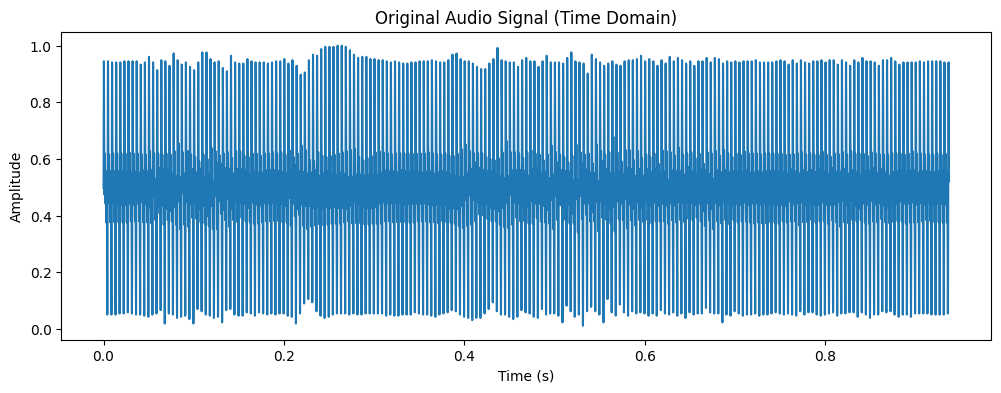

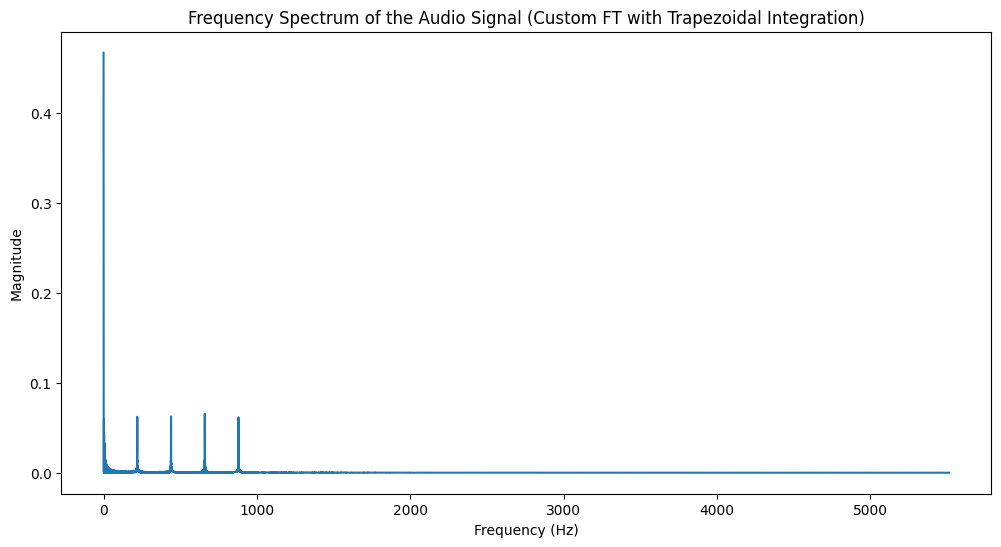

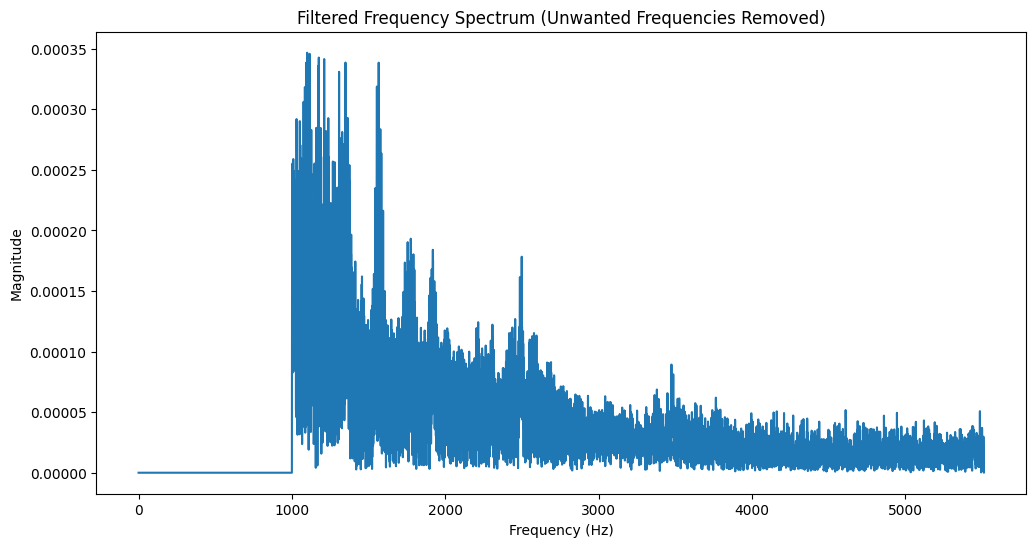

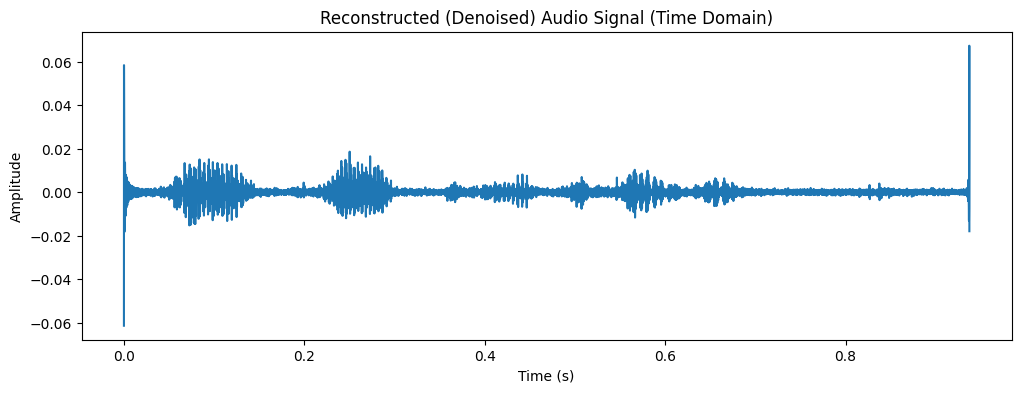

Denoised audio saved as 'denoised_audio.wav'


In [3]:
import numpy as np
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as plt

# Step 1: Load the audio file
sample_rate, data = wavfile.read('buzzjc.wav')
data = data / np.max(np.abs(data))  # Normalize to -1 to 1

# If stereo, convert to mono by averaging channels
if len(data.shape) > 1:
    data = data.mean(axis=1)

# Step 1.1: Plot the original audio signal in the time domain
plt.figure(figsize=(12, 4))
time = np.linspace(0, len(data) / sample_rate, num=len(data))
plt.plot(time, data)
plt.title("Original Audio Signal (Time Domain)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# Set parameters for interval sampling and FT
interval_step = 1  # Adjust for sampling every 'interval_step' data points  
data_sampled = data[::interval_step]
max_time = len(data_sampled) / (sample_rate / interval_step)
sampled_times = np.linspace(0, max_time, num=len(data_sampled))


max_freq = sample_rate / (2 * interval_step)
num_freqs = len(data_sampled)
frequencies = np.linspace(0, max_freq, num=num_freqs)

# Step 2: Apply Fourier Transform using trapezoidal integration
def fourier_transform(signal, frequencies, sampled_times):
    # use your code here from the first task
    dx=sampled_times[1]-sampled_times[0]
    num_freqs = len(frequencies)
    ft_result_real = np.zeros(num_freqs)
    ft_result_imag = np.zeros(num_freqs)
    for i,f in enumerate(frequencies):
        ft_result_real[i]=np.trapezoid(signal*np.cos(2*np.pi*f*sampled_times),dx=dx)
        ft_result_imag[i]=np.trapezoid(signal*np.sin(2*np.pi*f*sampled_times),dx=dx)

    return ft_result_real, ft_result_imag

    

# Apply FT with trapezoidal integration
ft_data = fourier_transform(data_sampled, frequencies, sampled_times)

# Step 2.1: Visualize the frequency spectrum
plt.figure(figsize=(12, 6))
plt.plot(frequencies, np.sqrt(ft_data[0]**2 + ft_data[1]**2))
plt.title("Frequency Spectrum of the Audio Signal (Custom FT with Trapezoidal Integration)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

# Step 3: Filter out unwanted noise frequencies
filtered_ft_data= np.zeros((2, num_freqs))
filtered_ft_data[0] = ft_data[0].copy()
filtered_ft_data[1] = ft_data[1].copy()



# Try to filter out the frequencies for which you get the best result.
# Experiment with different ideas like make the values for low frequencies zero, or make high frequencies zero, or make a range of frequencies zero. 
low_freq_cutoff = 1000 #low-frequency cutoff in Hz
low_freq_indices = frequencies < low_freq_cutoff
filtered_ft_data[0][low_freq_indices] = 0
filtered_ft_data[1][low_freq_indices] = 0

# Step 3.1: Visualize the filtered frequency spectrum
plt.figure(figsize=(12, 6))
plt.plot(frequencies, np.sqrt(filtered_ft_data[0]**2 + filtered_ft_data[1]**2))
plt.title("Filtered Frequency Spectrum (Unwanted Frequencies Removed)")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude")
plt.show()

# Step 4: Apply Inverse Fourier Transform using trapezoidal integration
def inverse_fourier_transform(ft_signal, frequencies, sampled_times):
    # use your code here from the first task
    n = len(sampled_times)
    reconstructed_signal = np.zeros(n)
    for(i,t) in enumerate(sampled_times):
        reconstructed_signal[i] = np.trapezoid(ft_signal[0]*np.cos(2*np.pi*frequencies*t)+ft_signal[1]*np.sin(2*np.pi*frequencies*t),dx=frequencies[1]-frequencies[0])
    
    return reconstructed_signal

# Step 4.1: Reconstruct the signal using IFT
filtered_data = inverse_fourier_transform(filtered_ft_data, frequencies, sampled_times)

# Step 4.2: Plot the reconstructed audio signal
plt.figure(figsize=(12, 4))
plt.plot(sampled_times, filtered_data)
plt.title("Reconstructed (Denoised) Audio Signal (Time Domain)")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.show()

# Step 5: Normalize and save the denoised audio
filtered_data = np.int16(filtered_data / np.max(np.abs(filtered_data)) * 32767)  # Convert to int16 format for WAV
wavfile.write('denoised_audio.wav', sample_rate, filtered_data)

print("Denoised audio saved as 'denoised_audio.wav'")


